Elapsed time to compute the importances: 0.004 seconds
URL                  0.040544
File                 0.061968
Require              0.035857
Ensure               0.045507
Include              0.109492
Attribute            0.148540
Hard_coded_string    0.166915
Command              0.028950
File_mode            0.013397
SSH_KEY              0.019919
Lines_of_code        0.214285
Comment              0.114628
dtype: float64


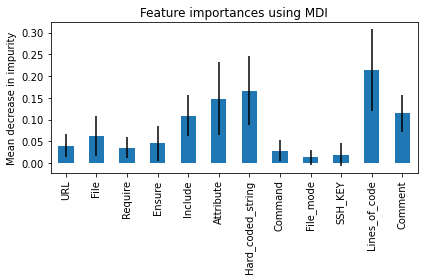

In [1]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
import time
import numpy as np
import csv
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

wikimedia_file_path = "IF_Data/IST_WIK.csv"
wikimedia_data = pd.read_csv(wikimedia_file_path)
wikimedia_data

y = wikimedia_data.defect_status
X = wikimedia_data.iloc[:, 2: -1 ]

train_X, val_X, train_y, val_y = train_test_split(X,y,random_state=1)


feature_names = ['URL', 'File', 'Require', 'Ensure', 'Include', 'Attribute', 'Hard_coded_string', 
'Command', 'File_mode', 'SSH_KEY', 'Lines_of_code', 'Comment']
forest = RandomForestClassifier(random_state=0)
forest.fit(train_X, train_y)

start_time = time.time()
importances = forest.feature_importances_
std = np.std([tree.feature_importances_ for tree in forest.estimators_], axis=0)
elapsed_time = time.time() - start_time

print(f"Elapsed time to compute the importances: {elapsed_time:.3f} seconds")


forest_importances = pd.Series(importances, index=feature_names)

print(forest_importances)
fig, ax = plt.subplots()
forest_importances.plot.bar(yerr=std, ax=ax)
ax.set_title("Feature importances using MDI")
ax.set_ylabel("Mean decrease in impurity")
fig.tight_layout()


In [73]:
#sorted_customers = sorted(forest_importances)
#print(sorted_customers)

fi_array = sorted(forest_importances.items(), key=lambda x: x[1], reverse=True)
# for i,row in enumerate(fi_mirantis):
#     print(fi_mirantis[i])
#     fi_mirantis[i]=round(fi_mirantis[i],3)
    
#res_mir = {key : round(order_mirantis[key], 3) for key in order_mirantis}
pdResult = pd.DataFrame(fi_array)
pdResult

,0,1
0,Lines_of_code,0.214285
1,Hard_coded_string,0.166915
2,Attribute,0.148540
3,Comment,0.114628
4,Include,0.109492
5,File,0.061968
6,Ensure,0.045507
7,URL,0.040544
8,Require,0.035857
9,Command,0.028950
